In [1]:
from bs4 import BeautifulSoup as bs
import requests

#### WebScraping Amazon reviews for Power-your-Subconscious-Mind book

In [2]:
link = 'https://www.amazon.in/Power-your-Subconscious-Mind/product-reviews/8192910962/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
page = requests.get(link)


In [4]:
page

<Response [200]>

In [5]:
page.content


b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,418YjvsUB+L.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31MKqadzl-L.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [6]:
soup = bs(page.content,'html.parser')


In [27]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Let me tell you about what the book says: Your Mind Has two parts, If you direct the conscious one to be positive , the subconscious one will bring happiness in your life.<br/>Now write it down in 3000 ways, explaining it. Again , Again, Again,<br/><br/>No no<br/><br/>Again, then Again..<br/><br/>Oh GOddd....put out some god, bible, Wife, wealth Money....<br/><br/>I mean Again....did you hear it?? Again<br/><br/>then Again.<br/><br/>Yes. You just wrote this book. Congrats, go to a publisher and sell it through amazon.<br/><br/>[Before End] : If this does not makes you rich, let me give you a suggestion from this book. Every night before sleep, just whisper : W-e-a-l-t-h....w..e..a..l..t..h.....You will sure become rich.
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   SPOILERS AHEAD PEOPLE!!<br/><br/>Murphy's idea is very simple

In [28]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\n\n  Let me tell you about what the book says: Your Mind Has two parts, If you direct the conscious one to be positive , the subconscious one will bring happiness in your life.Now write it down in 3000 ways, explaining it. Again , Again, Again,No noAgain, then Again..Oh GOddd....put out some god, bible, Wife, wealth Money....I mean Again....did you hear it?? Againthen Again.Yes. You just wrote this book. Congrats, go to a publisher and sell it through amazon.[Before End] : If this does not makes you rich, let me give you a suggestion from this book. Every night before sleep, just whisper : W-e-a-l-t-h....w..e..a..l..t..h.....You will sure become rich.\n\n',
 '\n\n  SPOILERS AHEAD PEOPLE!!Murphy\'s idea is very simple. He says if you want something, just embed the idea into your non-resistive (Subconscious) mind.To be honest,in the beginning of the book i did not find the whole idea very logical. It seemed like somebody is trying to sell some BS. But then a realization came upon me..

In [29]:
review_content[:] = [reviews.strip() for reviews in review_content]
review_content

['Let me tell you about what the book says: Your Mind Has two parts, If you direct the conscious one to be positive , the subconscious one will bring happiness in your life.Now write it down in 3000 ways, explaining it. Again , Again, Again,No noAgain, then Again..Oh GOddd....put out some god, bible, Wife, wealth Money....I mean Again....did you hear it?? Againthen Again.Yes. You just wrote this book. Congrats, go to a publisher and sell it through amazon.[Before End] : If this does not makes you rich, let me give you a suggestion from this book. Every night before sleep, just whisper : W-e-a-l-t-h....w..e..a..l..t..h.....You will sure become rich.',
 'SPOILERS AHEAD PEOPLE!!Murphy\'s idea is very simple. He says if you want something, just embed the idea into your non-resistive (Subconscious) mind.To be honest,in the beginning of the book i did not find the whole idea very logical. It seemed like somebody is trying to sell some BS. But then a realization came upon me...He says"By embe

In [30]:
import pandas as pd
df = pd.DataFrame()


In [31]:
df['Text']=review_content
df

,Text
0,Let me tell you about what the book says: Your...
1,SPOILERS AHEAD PEOPLE!!Murphy's idea is very s...
2,Very useful book...good for maintaining a calm...
3,I have no idea why people buy this one. I boug...
4,"This is my first book, I'm not very fond of re..."
5,This remarkable book has already helped reader...
6,Having read so many books & with technology be...
7,I read this book since the last 15 days every ...
8,It is just about self hypnosis or self suggest...
9,This book is filled with religious nonsense. N...


In [32]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq

the             51
to              34
and             26
of              23
a               22
book            22
is              20
you             18
it              17
this            16
in              14
be              12
with            11
your            10
I               10
idea            10
that             9
mind             9
can              8
subconscious     8
dtype: int64

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [35]:
df['Text']

0    Let tell book says: Your Mind Has two parts, I...
1    SPOILERS AHEAD PEOPLE!!Murphy's idea simple. H...
2    Very useful book...good maintaining calm menta...
3    I idea people buy one. I bought reading review...
4    This first book, I'm fond reading. But friend ...
5    This remarkable book already helped readers wo...
6    Having read many books & technology click away...
7    I read book since last 15 days every day night...
8    It self hypnosis self suggestion, stretch soun...
9    This book filled religious nonsense. No scient...
Name: Text, dtype: object

In [36]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_Sw

book            22
I               10
idea            10
mind             9
subconscious     8
people           6
many             5
This             5
read             5
If               5
want             4
But              4
scientific       4
book.            4
first            4
help             4
self             4
feel             4
like             3
one              3
dtype: int64

In [37]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])


In [38]:
# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)

df

,Text,subjectivity,polarity
0,"Let tell book says: Your Mind Has two parts, I...",0.585760,0.229419
1,SPOILERS AHEAD PEOPLE!!Murphy's idea simple. H...,0.583844,0.195238
2,Very useful book...good maintaining calm menta...,0.469444,0.310000
3,I idea people buy one. I bought reading review...,0.522222,-0.011111
4,"This first book, I'm fond reading. But friend ...",0.266667,0.075000
5,This remarkable book already helped readers wo...,0.554670,0.145513
6,Having read many books & technology click away...,0.390765,0.091098
7,I read book since last 15 days every day night...,0.066667,0.000000
8,"It self hypnosis self suggestion, stretch soun...",0.471873,0.243978
9,This book filled religious nonsense. No scient...,0.483333,-0.033333


The polarity is a value ranging between -1 and 1, with -1 being very negative and +1 very positive. he subjectivity ranges between 0 and 1, and refers to the person’s opinion, emotion, or even judgment. The higher the number, the more subjective the text is

**Creating a word cloud**

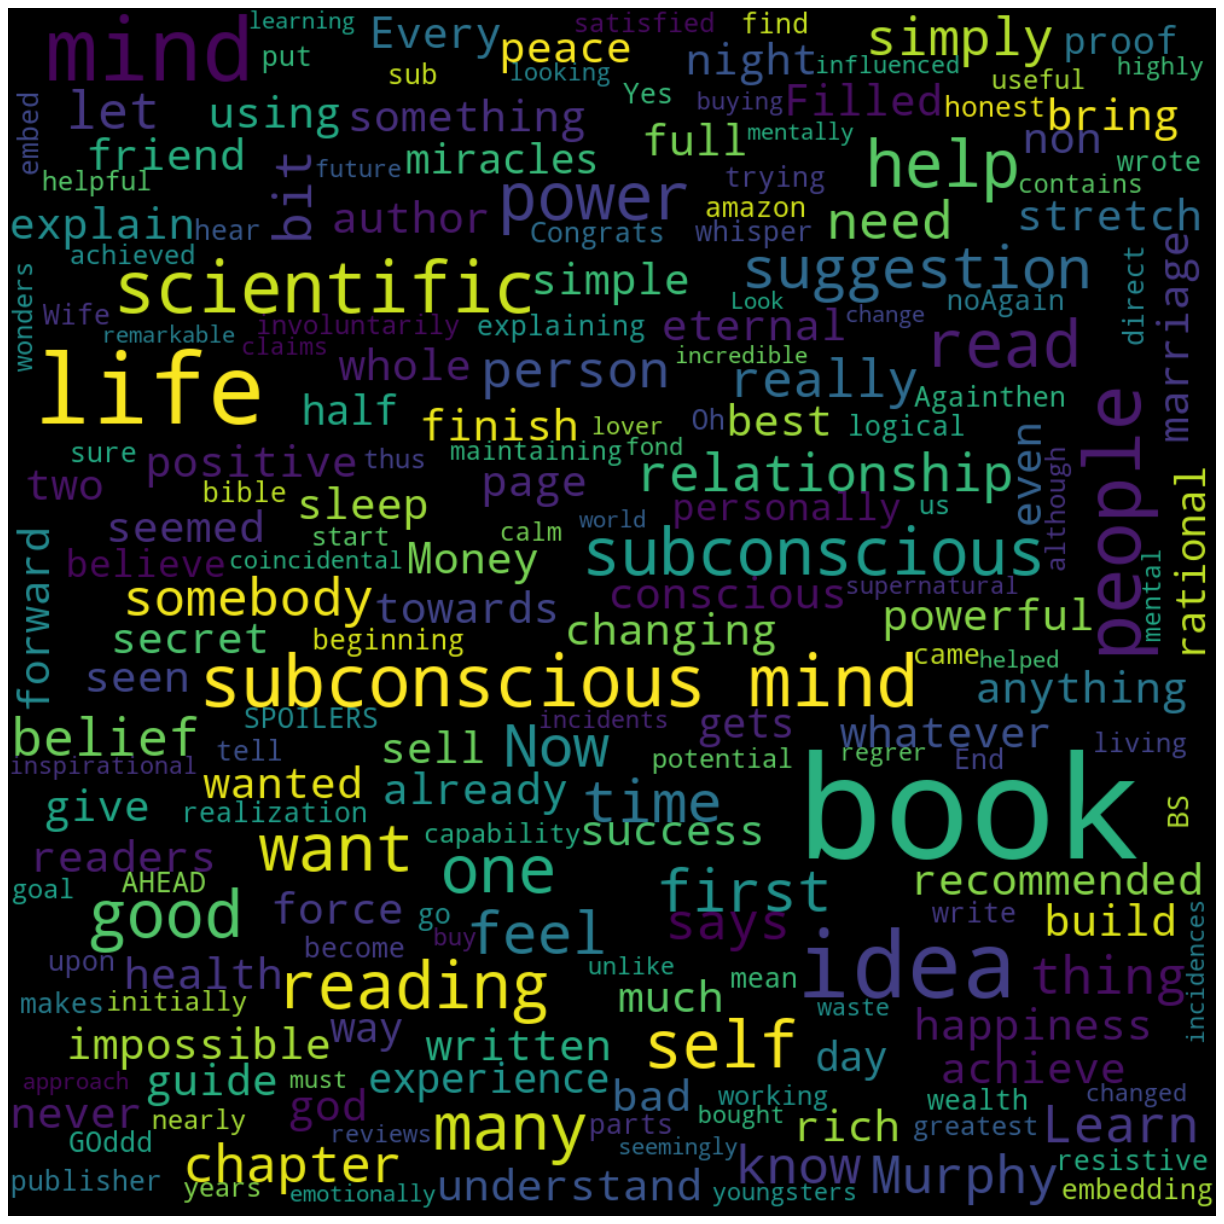

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [40]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    

In [41]:
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,Text,subjectivity,polarity,analysis
0,"Let tell book says: Your Mind Has two parts, I...",0.585760,0.229419,Positive
1,SPOILERS AHEAD PEOPLE!!Murphy's idea simple. H...,0.583844,0.195238,Positive
2,Very useful book...good maintaining calm menta...,0.469444,0.310000,Positive
3,I idea people buy one. I bought reading review...,0.522222,-0.011111,Negative
4,"This first book, I'm fond reading. But friend ...",0.266667,0.075000,Positive
5,This remarkable book already helped readers wo...,0.554670,0.145513,Positive
6,Having read many books & technology click away...,0.390765,0.091098,Positive
7,I read book since last 15 days every day night...,0.066667,0.000000,Neutral
8,"It self hypnosis self suggestion, stretch soun...",0.471873,0.243978,Positive
9,This book filled religious nonsense. No scient...,0.483333,-0.033333,Negative


In [46]:
### Displaying the positive and negative reviews
positive_reviews = df[df['analysis'] == 'Positive']
negative_reviews = df[df['analysis'] == 'Negative']

print('positive Reviews')
for i, row in positive_reviews[:5].iterrows():
  print(' -' + row['Text'])

print('negative Reviews')
for i, row in negative_reviews[:5].iterrows():
  print(' -' + row['Text'])

positive Reviews
 -Let tell book says: Your Mind Has two parts, If direct conscious one positive , subconscious one bring happiness life.Now write 3000 ways, explaining it. Again , Again, Again,No noAgain, Again..Oh GOddd....put god, bible, Wife, wealth Money....I mean Again....did hear it?? Againthen Again.Yes. You wrote book. Congrats, go publisher sell amazon.[Before End] : If makes rich, let give suggestion book. Every night sleep, whisper : W-e-a-l-t-h....w..e..a..l..t..h.....You sure become rich.
 -SPOILERS AHEAD PEOPLE!!Murphy's idea simple. He says want something, embed idea non-resistive (Subconscious) mind.To honest,in beginning book find whole idea logical. It seemed like somebody trying sell BS. But realization came upon me...He says"By embedding idea sub-conscious get anything". But, how???Now feel know how, force idea mind involuntarily start working towards greatest capability using full potential thus achieved seemed initially impossible us.All all, book really helpful 

**Most of the reviews are positive or negative?**

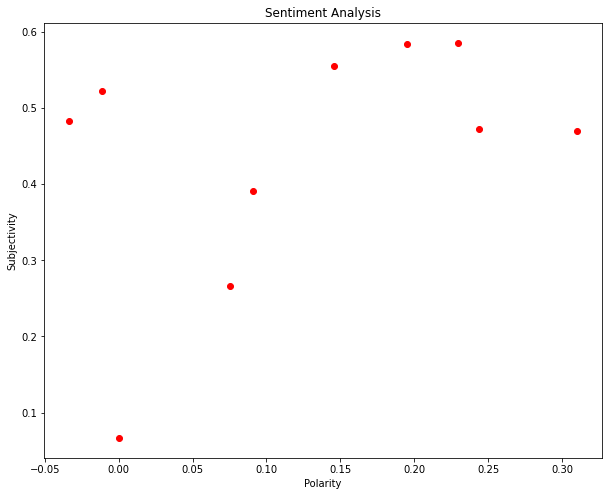

In [47]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [48]:
len(positive_reviews) / len(negative_reviews)


3.5

## The book has mostly positive reviews compared to negative onces